# Comparison check between Rosie's original run and latest updates

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx

## Load history output data

In [2]:
# Rosie's rewind baseline
data_rosie_base = xr.open_dataset('seb_CLM5-SPfates-def_rewindtest0.clm2.h0.2001.nc')
data_rosie_base_2000 = xr.open_dataset('seb_CLM5-SPfates-def_rewindtest0.clm2.h0.2000.nc')

# Greg test using latest branch but reinstating the nocomp_label_pft + small patch removal
data_rev_last = xr.open_dataset('sp_mode-dev053-srof-revertnocomp_label-revertsmallarea.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F51112204.intel.clm2.h0.2001.nc')
data_rev_last_2000 = xr.open_dataset('sp_mode-dev053-srof-revertnocomp_label-revertsmallarea.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cb9f4ef9a-F51112204.intel.clm2.h0.2000.nc')

# Greg test using tlai_hist_patch in dynamics_driv
data_laihistpatch = xr.open_dataset('sp_mode-dev053-srof-charliefix-tlaihistpatch.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cc2f6776c-F70c31955.intel.clm2.h0.2001.nc')
data_laihistpatch_2000 = xr.open_dataset('sp_mode-dev053-srof-charliefix-tlaihistpatch.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Cc2f6776c-F70c31955.intel.clm2.h0.2000.nc')

# fates_sp_debug2 + SP_api (ctsm5.1.dev054-83-ga12d02ff)
data_dbg2 = xr.open_dataset('sp_mode-dev054-srof-fates_sp_debug2.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev054-Ca12d02ff-F872eaf26.intel.clm2.h0.2001.nc')
data_dbg2_2000 = xr.open_dataset('sp_mode-dev054-srof-fates_sp_debug2.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev054-Ca12d02ff-F872eaf26.intel.clm2.h0.2000.nc')

## Check the dimension mapping size

## TLAI

The plots of TLAI below represent the type correction that [Charlie recommended](https://github.com/ESCOMP/CTSM/pull/1182#discussion_r694458033).  We can see comparing the first and second plot to the third, that the TLAI looks correct as of [this commit](https://github.com/ESCOMP/CTSM/pull/1182/commits/b9f4ef9a1eb81981acee8628c0660a9bf6a93fa0).

In [3]:
data_rosie_base.TLAI.dims

('time', 'lat', 'lon')

In [4]:
data_rosie_base.TLAI.time.size

12

In [5]:
tlai_rosie_base = data_rosie_base.TLAI
tlai_rosie_base_2000 = data_rosie_base_2000.TLAI
tlai_rev_last = data_rev_last.TLAI
tlai_rev_last_2000 = data_rev_last_2000.TLAI
tlai_laihp = data_laihistpatch.TLAI
tlai_laihp_2000 = data_laihistpatch_2000.TLAI
tlai_dbg2 = data_dbg2.TLAI

tlai_rbrv_diff = tlai_rosie_base - tlai_rev_last
tlai_rbrv_2000_diff = tlai_rosie_base_2000 - tlai_rev_last_2000
tlai_rblh_diff = tlai_rosie_base - tlai_laihp
tlai_rvlh_diff = tlai_rev_last - tlai_laihp
tlai_rbd2_diff = tlai_rosie_base - tlai_dbg2

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

Reinstating the small patch removal keeps the TLAI different at the same order of magnitude.  This was [erroneously removed](https://github.com/NGEET/fates/commit/9cc3e7c36af64ca10d5b0be85c199bf5b070951a) in attempting to make the FBG b4b with the previous tag baseline.  It was later discussed that the new FBG results are more correct relative to the old baseline.

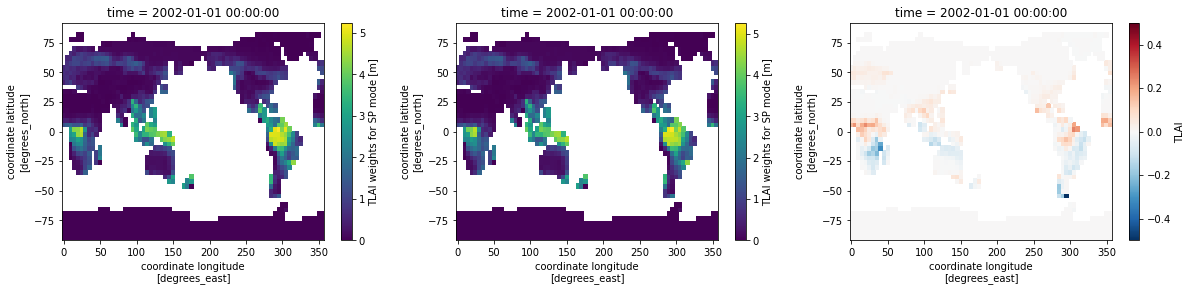

In [6]:
# Rosie baseline - small patch revert comparison - 2001
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_rev_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbrv_diff.isel(time=tstop_idx).plot(ax=ax3)

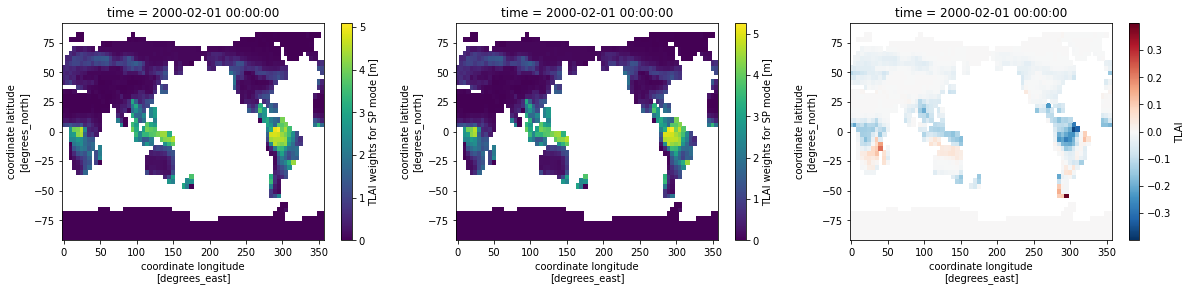

In [7]:
# rosie baseline - small patch revert comparison - 2000
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base_2000.isel(time=tstop_idx).plot(ax=ax1)
tlai_rev_last_2000.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbrv_2000_diff.isel(time=tstop_idx).plot(ax=ax3)

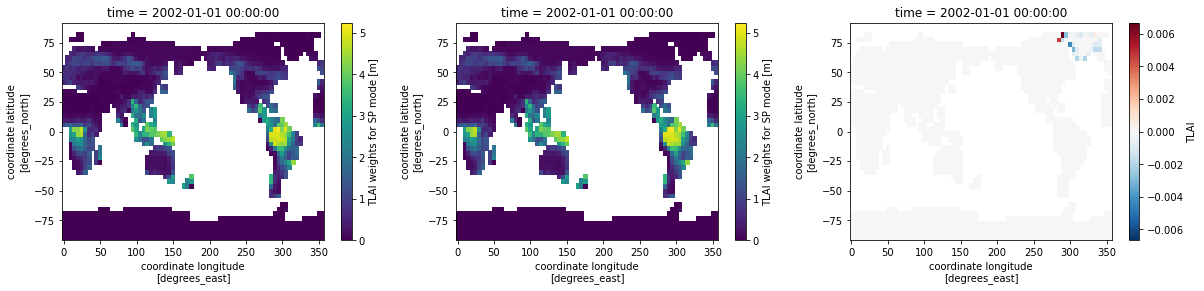

In [9]:
# rosie baseline - fates_sp_debug2 filter
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_dbg2.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbd2_diff.isel(time=tstop_idx).plot(ax=ax3,)

## GPP

In [15]:
data_rosie_base.GPP.dims

('time', 'lat', 'lon')

In [11]:
gpp_rosie_base = data_rosie_base.GPP
gpp_rosie_base_2000 = data_rosie_base_2000.GPP
gpp_rev_last = data_rev_last.GPP
gpp_rev_last_2000 = data_rev_last_2000.GPP
gpp_dbg2 = data_dbg2.GPP

gpp_rbrv_diff = gpp_rosie_base - gpp_rev_last
gpp_rbd2_diff = gpp_rosie_base - gpp_dbg2

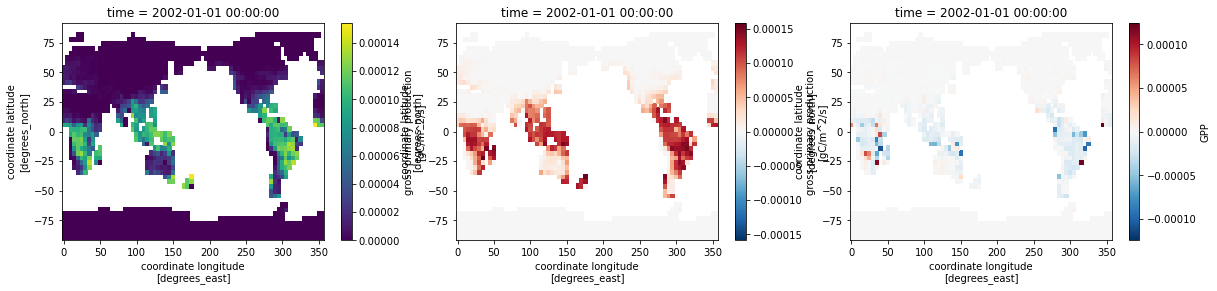

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_rev_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbrv_diff.isel(time=tstop_idx).plot(ax=ax3)

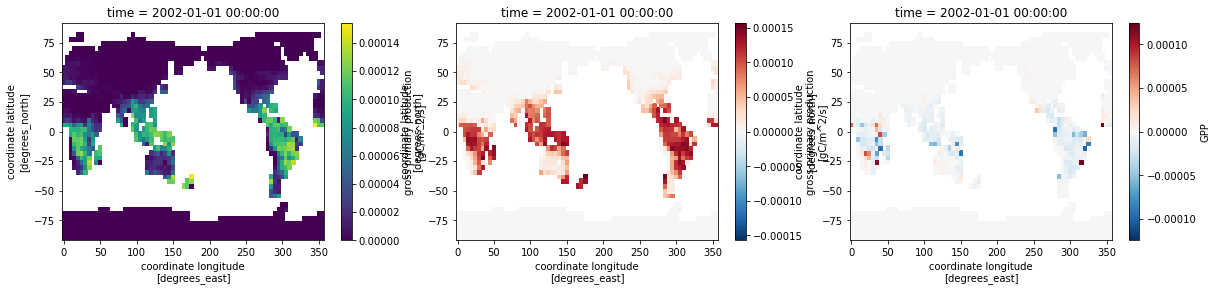

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_dbg2.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbd2_diff.isel(time=tstop_idx).plot(ax=ax3)

## PFTnindivs

In [25]:
data_rosie_base.PFTnindivs.dims

('time', 'fates_levpft', 'lat', 'lon')

In [24]:
npind_rosie_base = data_rosie_base.PFTnindivs
npind_rosie_base_2000 = data_rosie_base_2000.PFTnindivs
npind_rev_last = data_rev_last.PFTnindivs
npind_rev_last_2000 = data_rev_last_2000.PFTnindivs
npind_rb2 = data_dbg2.PFTnindivs

npind_rbrv_diff = npind_rosie_base - npind_rev_last
npind_rbrv_diff_2000 = npind_rosie_base_2000 - npind_rev_last_2000
npind_rbd2_diff = npind_rosie_base - npind_rb2

In [15]:
figs = (16,8)
tstop_idx = 11

### Rosie rewind baseline - Rosie latest comparison

Note that the scaling of the plots below is manually adjusted to avoid a swamping effect.

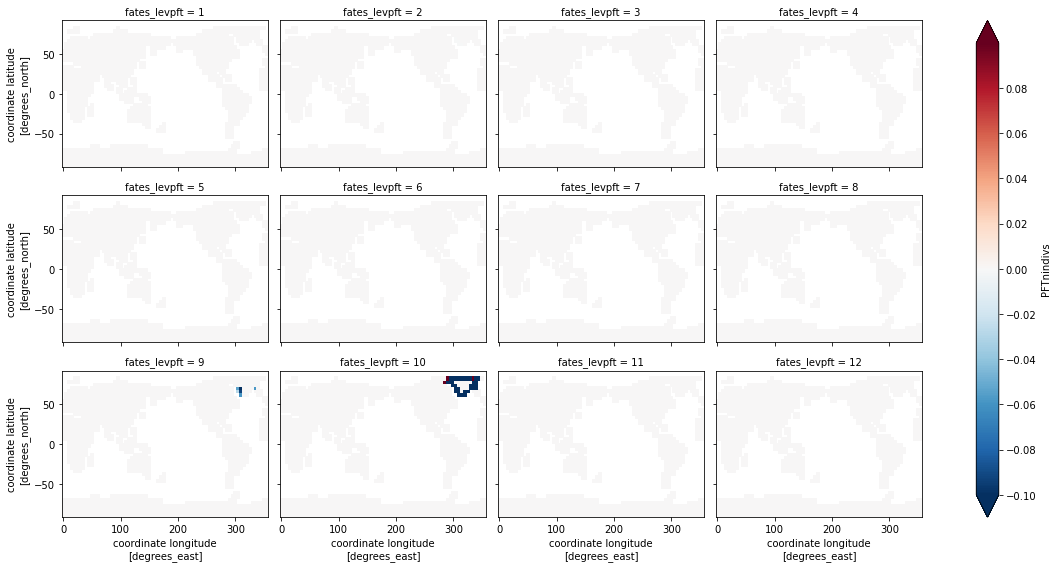

In [22]:
# Rosie baseline-Rosie latest: all levels
npind_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-0.1,0.1,.00001))
# npind_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

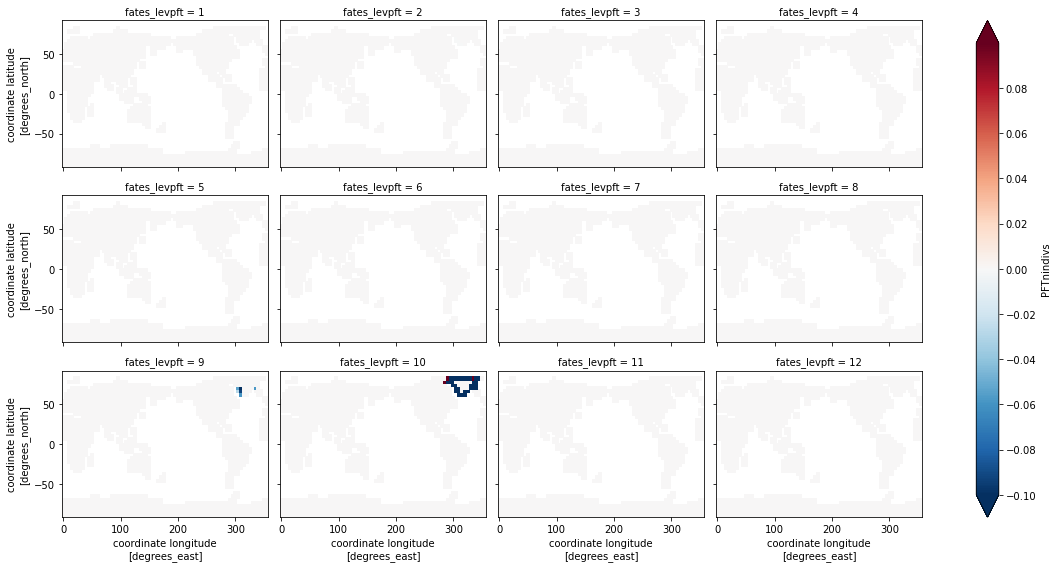

In [26]:
# Rosie baseline-nocomp_label revert: all levels
npind_rbd2_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-0.1,0.1,.00001))
# npind_rbd2_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

## PFTbiomass

In [34]:
data_rosie_base.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [35]:
data_rosie_base.PFTbiomass.fates_levpft.size

12

In [36]:
pbm_rosie_base = data_rosie_base.PFTbiomass
pbm_rosie_base_2000 = data_rosie_base_2000.PFTbiomass
pbm_rosie_last = data_rosie_last.PFTbiomass
pbm_greg_last = data_greg_last.PFTbiomass
pbm_apft_last = data_areapft_last.PFTbiomass
pbm_rev_last = data_rev_last.PFTbiomass
pbm_rev_last_2000 = data_rev_last_2000.PFTbiomass

pbm_rbrl_diff = pbm_rosie_base - pbm_rosie_last
pbm_rbgl_diff = pbm_rosie_base - pbm_greg_last
pbm_rlgl_diff = pbm_rosie_last - pbm_greg_last
pbm_rbap_diff = pbm_rosie_base - pbm_apft_last
pbm_rbrv_diff = pbm_rosie_base - pbm_rev_last
pbm_rbrv_diff_2000 = pbm_rosie_base_2000 - pbm_rev_last_2000

### Rosie rewind baseline

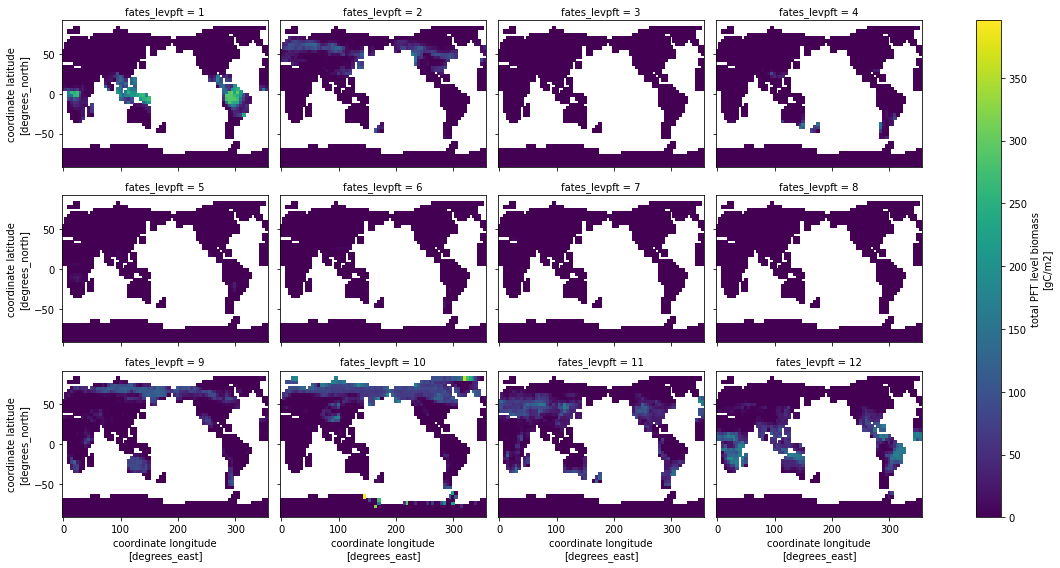

In [37]:
pbm_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - Rosie greg_sp_test_nosai comparison

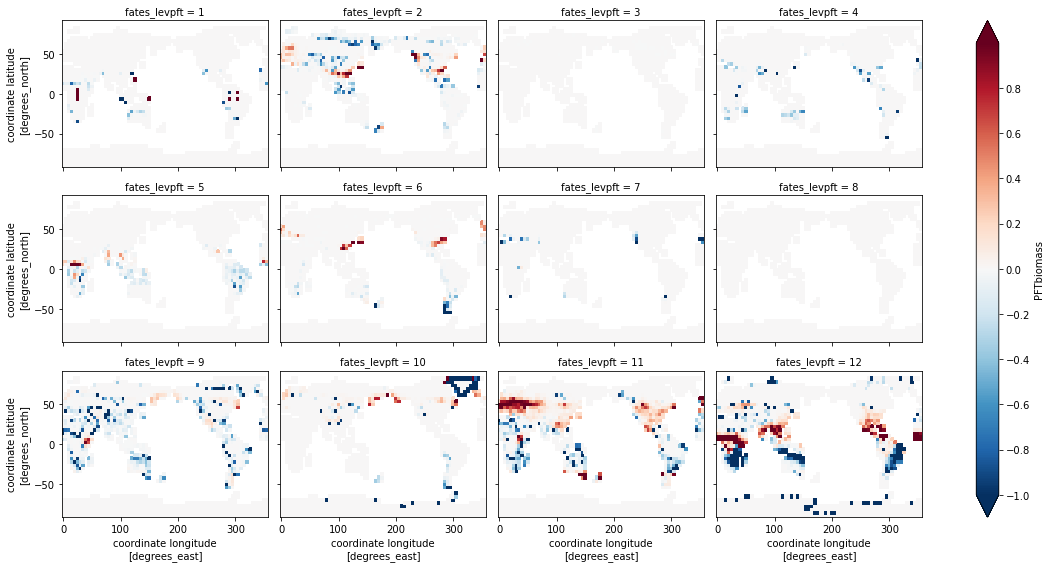

In [38]:
pbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))

### Rosie greg_sp_test_nosai baseline - Greg latest comparison

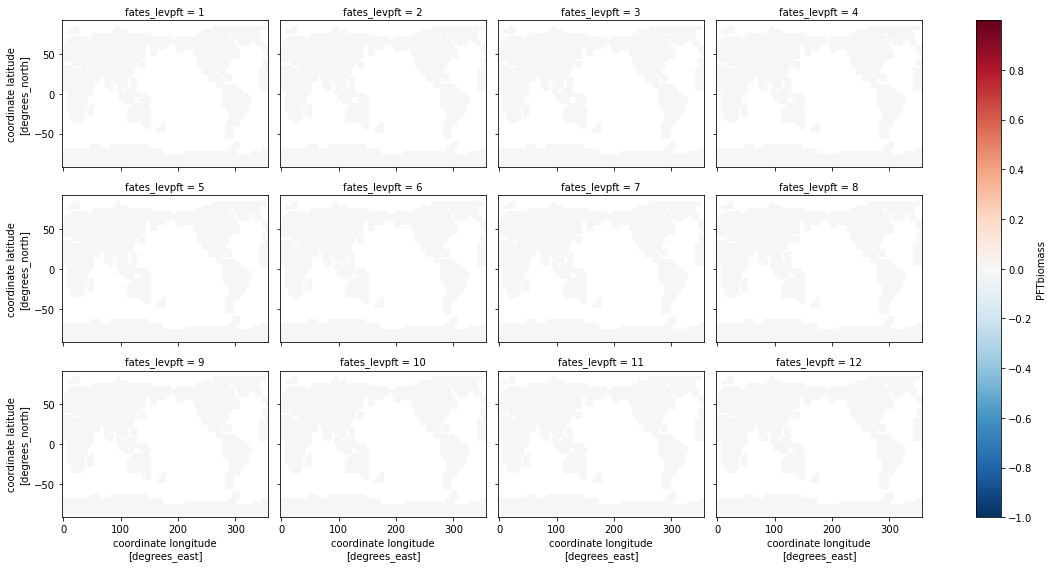

In [39]:
pbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))

### Rosie rewind baseline - nocomp_label reinstate comparison

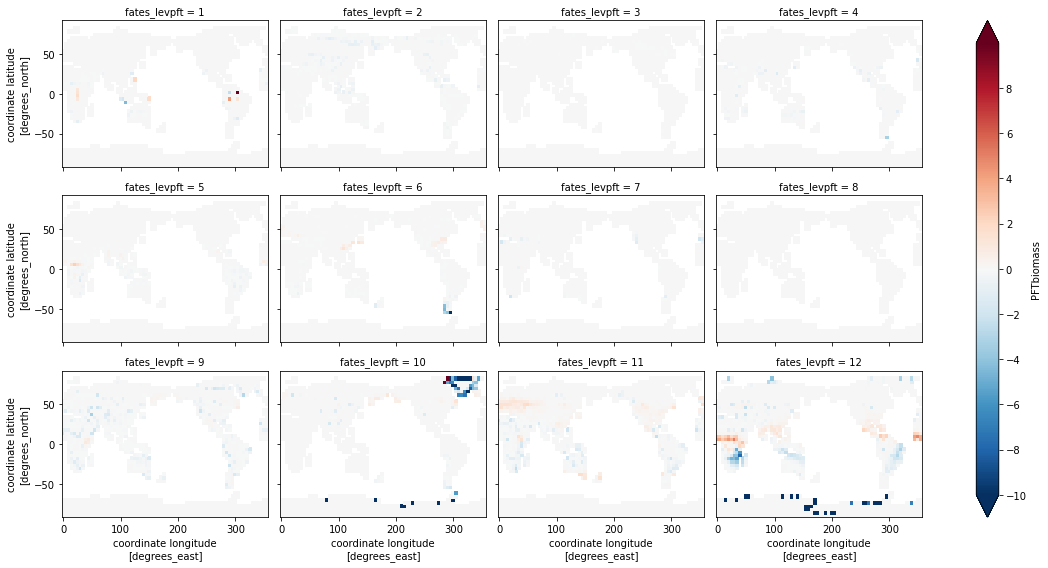

In [40]:
pbm_rbap_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

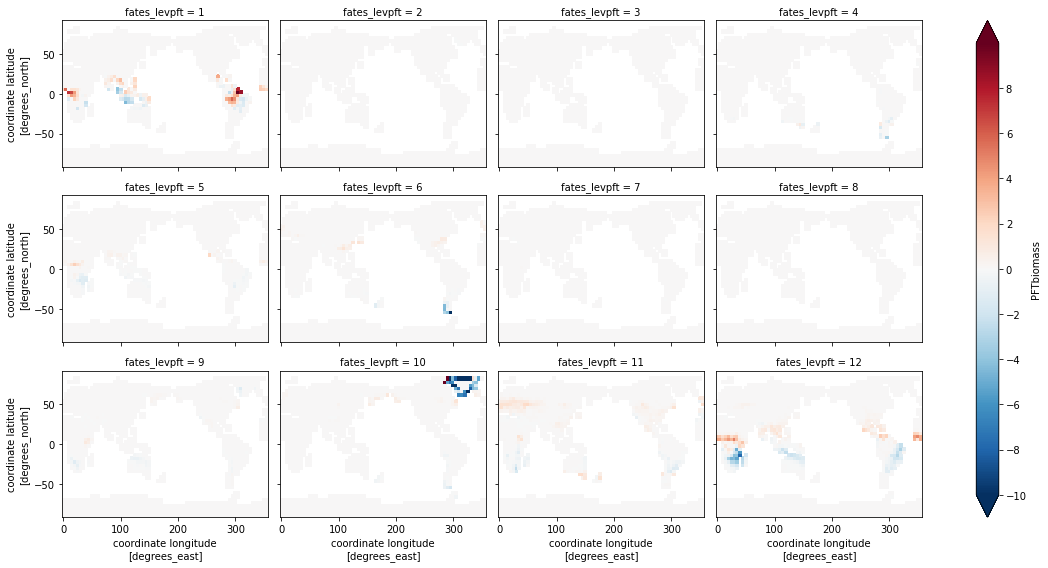

In [41]:
pbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))

Replicating Charlie's comparison

## PFTleafbiomass

In [42]:
data_rosie_base.PFTleafbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [43]:
data_rosie_base.PFTleafbiomass.fates_levpft.size

12

In [44]:
plbm_rosie_base = data_rosie_base.PFTleafbiomass
plbm_rosie_base_2000 = data_rosie_base_2000.PFTleafbiomass
plbm_rosie_last = data_rosie_last.PFTleafbiomass
plbm_greg_last = data_greg_last.PFTleafbiomass
plbm_apft_last = data_areapft_last.PFTleafbiomass
plbm_rev_last = data_rev_last.PFTleafbiomass
plbm_rev_last_2000 = data_rev_last_2000.PFTleafbiomass

plbm_rbrl_diff = plbm_rosie_base - plbm_rosie_last
plbm_rbgl_diff = plbm_rosie_base - plbm_greg_last
plbm_rlgl_diff = plbm_rosie_last - plbm_greg_last
plbm_rbap_diff = plbm_rosie_base - plbm_apft_last
plbm_rbrv_diff = plbm_rosie_base - plbm_rev_last
plbm_rbrv_diff_2000 = plbm_rosie_base_2000 - plbm_rev_last_2000

### Rosie rewind baseline

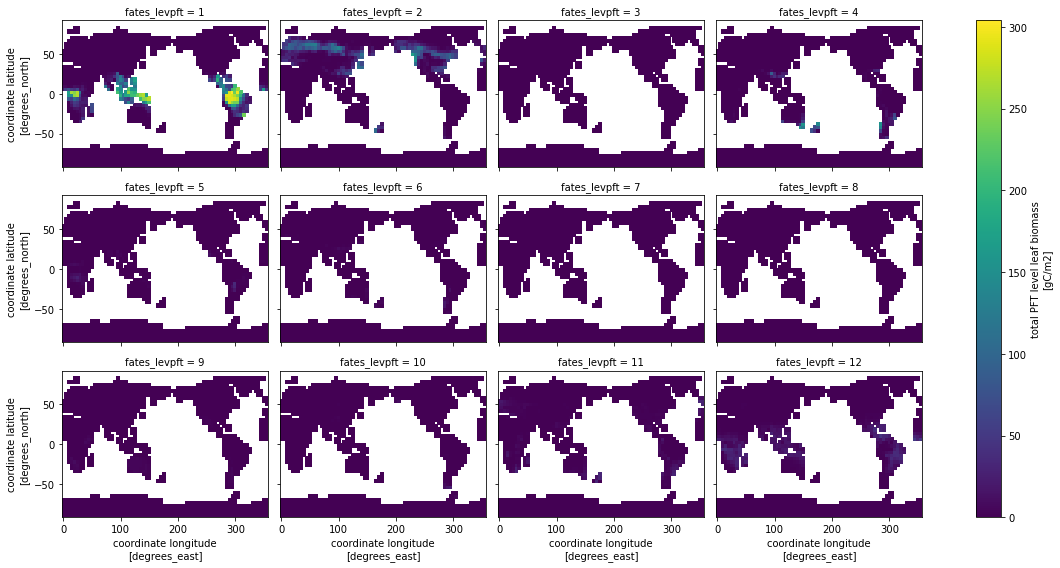

In [45]:
plbm_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - Rosie greg_sp_test_nosai comparison

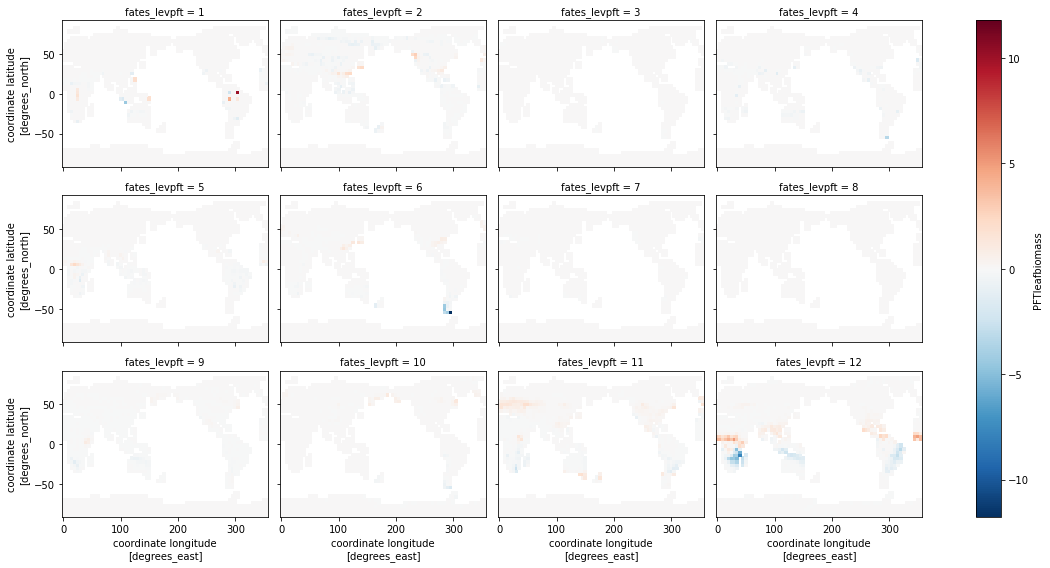

In [46]:
plbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)
# plbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))

### Rosie greg_sp_test_nosai baseline - Greg latest comparison

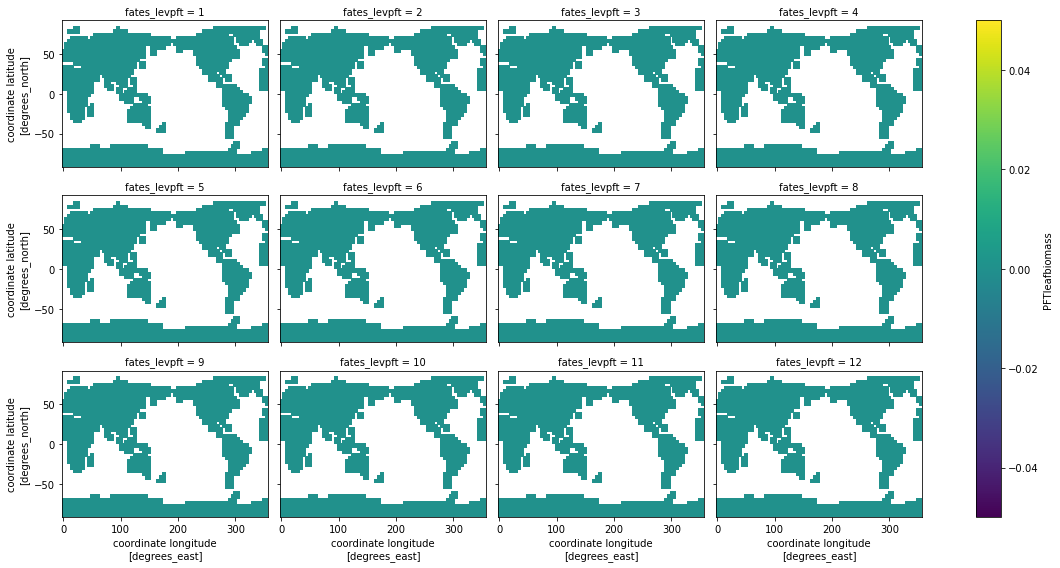

In [47]:
# plbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-1,1,.001))
plbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - nocomp_label reinstate comparison

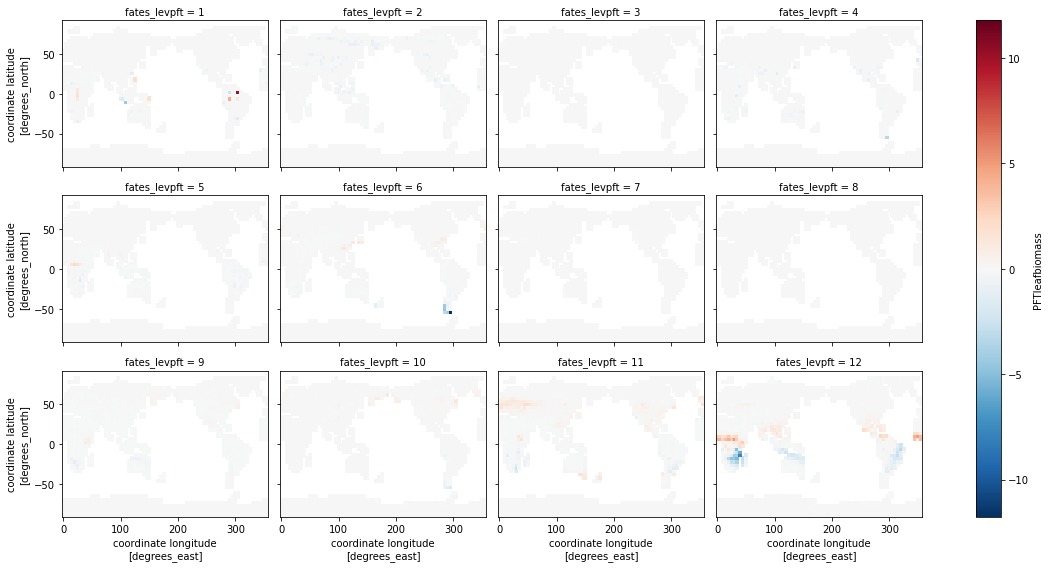

In [48]:
# plbm_rbap_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))
plbm_rbap_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

### Rosie rewind baseline - nocomp_label + small patch removal reinstate comparison

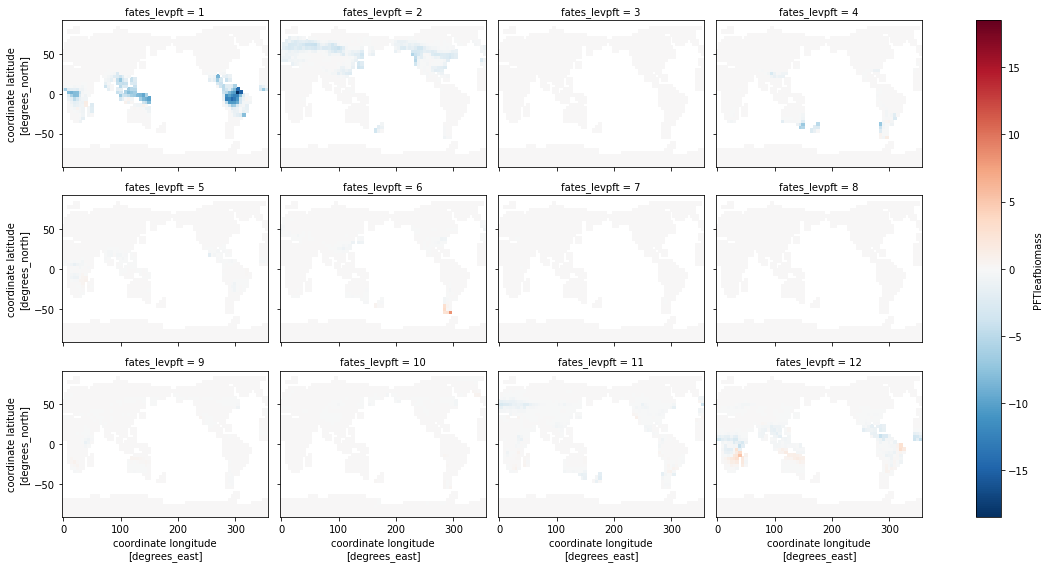

In [49]:
tstop_idx = 0
# plbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))
plbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)

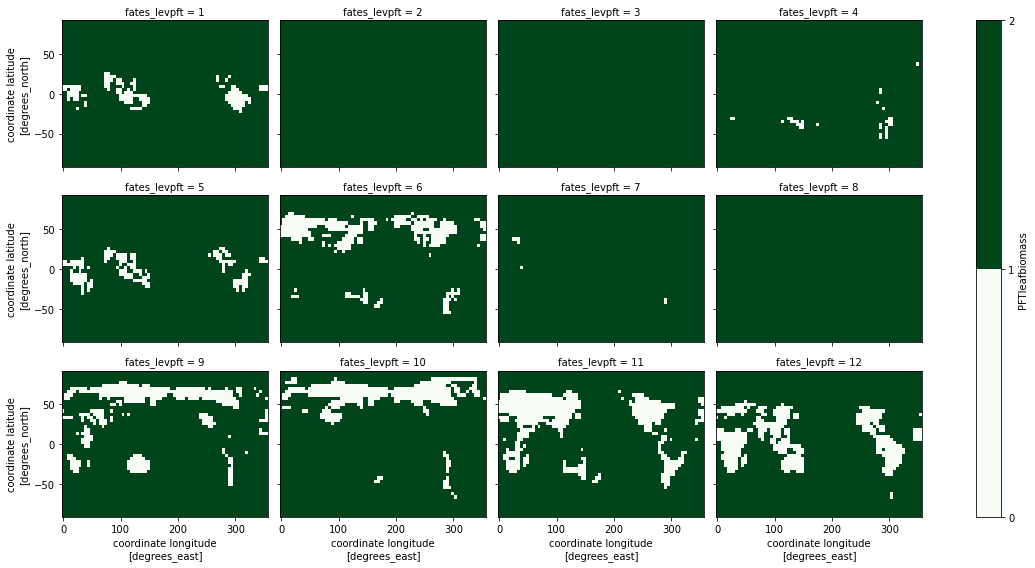

In [50]:
tstop_idx = 11
# plbm_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(-10,10,.001))
# plbm_rbrv_diff_2000.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs)
((plbm_rosie_base[1:11].var(dim='time') > 1e-5) == (plbm_rev_last[1:11].var(dim='time') > 1e-5)).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=figs,levels=np.arange(3), cmap='Greens')

### Variable spatial comparisons

In [51]:
leafc_rosie_base = data_rosie_base.LEAFC
leafc_rev_last = data_rev_last.LEAFC
agb_rosie_base = data_rosie_base.AGB
agb_rev_last = data_rev_last.AGB

leafc_rbrv_diff = leafc_rosie_base - leafc_rev_last
agb_rbrv_diff = agb_rosie_base - agb_rev_last

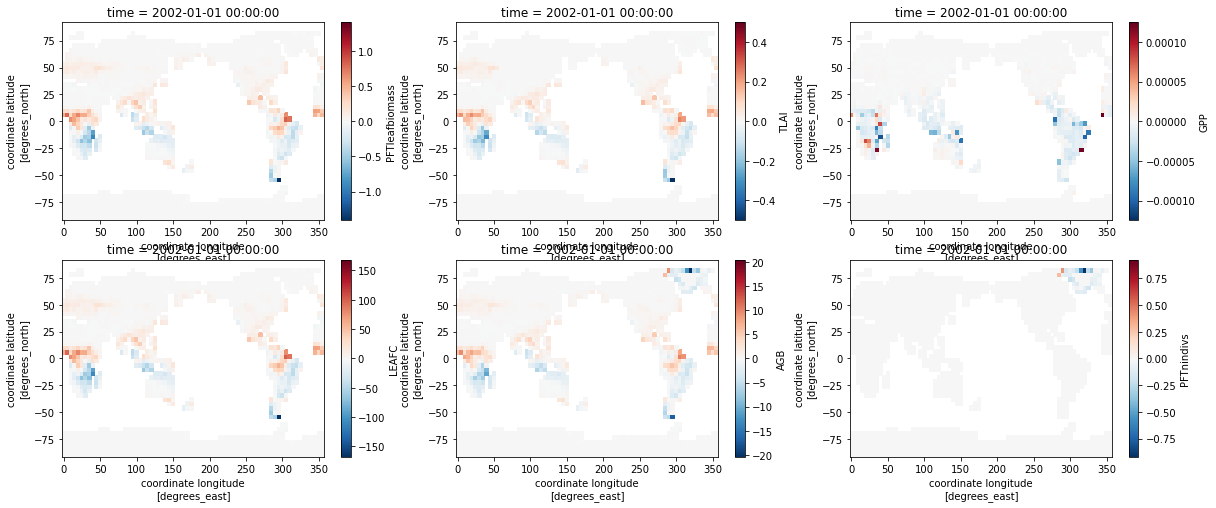

In [52]:
plbm_rosie_base_mean = plbm_rosie_base.mean(dim='fates_levpft')
plbm_rev_last_mean = plbm_rev_last.mean(dim='fates_levpft')
plbm_rbrv_meandiff = plbm_rosie_base_mean - plbm_rev_last_mean

npft_rosie_base_mean = npft_rosie_base.mean(dim='fates_levpft')
npft_rev_last_mean = npft_rev_last.mean(dim='fates_levpft')
npft_rbrv_meandiff = npft_rosie_base_mean - npft_rev_last_mean

# nocomp_label_revert - full revert diffs
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 8))
plbm_rbrv_meandiff.isel(time=tstop_idx).plot(ax=ax1)
tlai_rbrv_diff.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbrv_diff.isel(time=tstop_idx).plot(ax=ax3)
npft_rbrv_meandiff.isel(time=tstop_idx).plot(ax=ax6)
leafc_rbrv_diff.isel(time=tstop_idx).plot(ax=ax4)
agb_rbrv_diff.isel(time=tstop_idx).plot(ax=ax5)

The above suggests that the issue here is with the `leaf_m` calculation which is common between PFTleafbiomass, TLAI, LEAFC and AGB

## Crown Area

In [60]:
crown_rosie_base = data_rosie_base.PFTcrownarea
crown_rosie_base_2000 = data_rosie_base_2000.PFTcrownarea
crown_rosie_last = data_rosie_last.PFTcrownarea
# crown_greg_last = data_greg_last.PFTcrownarea
# crown_apft_last = data_areapft_last.PFTcrownarea
# crown_rev_last = data_rev_last.PFTcrownarea
# crown_rev_last_2000 = data_rev_last_2000.PFTcrownarea

crown_rbrl_diff = crown_rosie_base - crown_rosie_last
# crown_rbgl_diff = crown_rosie_base - crown_greg_last
# crown_rlgl_diff = crown_rosie_last - crown_greg_last
# crown_rbap_diff = crown_rosie_base - crown_apft_last
# crown_rbrv_diff = crown_rosie_base - crown_rev_last
# crown_rbrv_diff_2000 = crown_rosie_base_2000 - crown_rev_last_2000

In [61]:
crown_rosie_base.dims

('time', 'fates_levpft', 'lat', 'lon')

In [ ]:
tstop_idx = 11
crown_rbrv_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levcan',col_wrap=2,figsize=(12,4))

## Variable plots

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
ax1.scatter(tlai_rosie_base.mean(dim='time'),gpp_rosie_base.mean(dim='time'));
ax2.scatter(tlai_rev_last.mean(dim='time'),gpp_rev_last.mean(dim='time'));